This notbook is inspired on Andrej Karpathy's youtube lecture about micrograd. Available on https://www.youtube.com/watch?v=VMj-3S1tku0&t=5128s 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 -4*x + 5

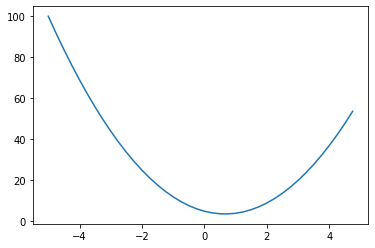

In [3]:
xs = np.arange (-5,5,0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
h = 0.001
x = 3

In [5]:
# As it is excruciating to calculate the real derivative of a neural network, we go By the definition of derivative:
# f' = (f(x+h)-f(x))/h
# So the slope at point x is the following
(f(x+h)-f(x))/h

14.00300000000243

In [6]:
# Getting more complex and similar to neurons in neural networks
h=0.001
a = 2
b = -3
c = 10

d1 = a*b + c
a+=h
d2 = a*b+c
print('d1: ',d1)
print('d2: ',d2)
print('slope: ',(d2-d1)/h)

d1:  4
d2:  3.997
slope:  -3.0000000000001137


In [21]:
# This is a data structre that will maintain these expressions in neural newtworks with its expressions
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children) # Children are supposed to be tuples. _prev represents the previous value before the last operation
        self._op = _op # Operation symbol
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        # Defining these operators with these __xxx__
        out = Value(self.data +other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
     

In [22]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data = -8.0)

In [9]:
d._prev, d._op

({Value(data = -15), Value(data = 17)}, '+')

In [23]:
import graphviz 
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % ( n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

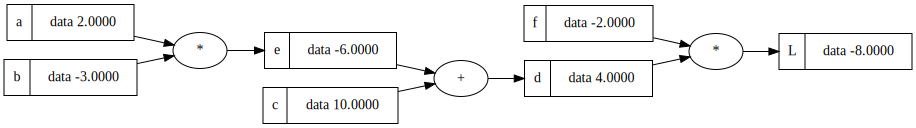

In [25]:
draw_dot(L)